### Import libraries, date and checking of data types

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

%matplotlib inline

In [58]:
url = 'https://raw.githubusercontent.com/inreleppik/Projects/main/AB%20Test%20Project/Data/ab_data.csv'
df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df.timestamp)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [59]:
df.user_id.value_counts()

805339    2
754884    2
722274    2
783176    2
898232    2
         ..
642985    1
771499    1
923606    1
712675    1
715931    1
Name: user_id, Length: 290584, dtype: int64

In [60]:
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

### Checking to see if there are any users in control group that saw new page and users in treatment group that saw old page

In [61]:
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

### Removing control/new_page and treatment/old_page

In [62]:
df = df.loc[(df['group'] == 'control')&(df['landing_page'] == 'old_page')|
           (df['group'] == 'treatment')&(df['landing_page'] == 'new_page')]
df.groupby(['group', 'landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


### Checking for duplicate values

In [63]:
df['user_id'].duplicated().sum()

1

### Finding user_id for duplicate value

In [64]:
df[df.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [65]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [66]:
df = df.drop_duplicates(subset='user_id', keep='first')

In [67]:
groups = df.groupby(['group', 'landing_page', 'converted'], as_index=False).count()
groups.rename(columns={'user_id': 'users'}, inplace = True)

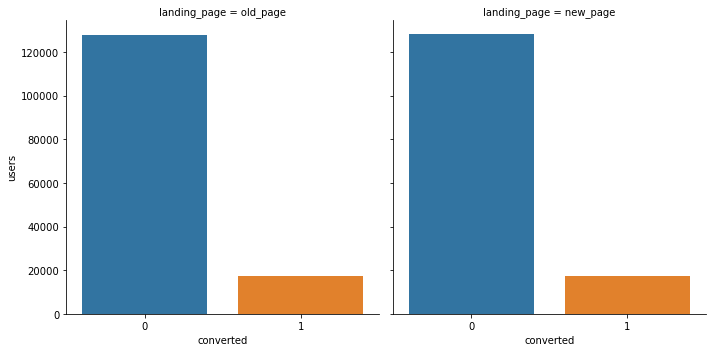

In [97]:
sns.catplot(data=groups, x= 'converted', y= 'users', col = 'landing_page', kind='bar')
plt.show()

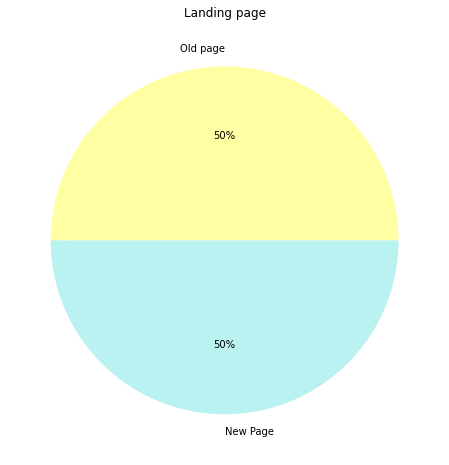

In [90]:
fix, ax = plt.subplots(figsize=(8,8))
data = df.landing_page.value_counts()
colors = sns.color_palette('pastel')[8:10]
labels = ['Old page', 'New Page']
title = 'Landing Page'
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Landing page')
plt.show()

### Re-arrange data into 2x2 for Chi-Squared

In [70]:
# 1) Split groups into two separate DataFrames
a = df[df.group == 'control']
b = df[df.group == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()

b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) create numpy array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])
p_v = stats.chi2_contingency(T, correction=False)[1]
print(p_v)

0.18988337448194853


### The p-value was calculated to be 19%. Assuming a 5% level of significance, we can deduce that the p-value is greater than the alpha and that we do not reject the null hypothesis. In simpler terms, there is no significance in conversions between the old and new webpage.

#### Sanity Check

In [71]:
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.1203863045004612 0.11880806551510564


### As a sanity check, I calculated the conversion rates between the two groups and the difference between them is minimal, which reassures that this was conducted properly.